# Example_1: Estimating groundwater recharge and actual evapotranspiration in the north-eastern part of Slovenia

### Import packages

In [24]:
import geopandas
import numpy as np
import pandas as pd

from gwet.gwet import hydrotop

### Import hydrotops shapefile using Geopandas

In [25]:
hydrotops_shp = geopandas.read_file("example_1/shapefile/hydrotops.shp")
hydrotops_shp = hydrotops_shp.set_index("ID")
hydrotops_shp.head()

,landuse_id,soil_id,precip_id,geometry
ID,,,,
9,3,402,2,"MULTIPOLYGON (((572810.000 170990.000, 572810...."
10,3,402,1,"MULTIPOLYGON (((564680.000 173300.000, 564680...."
5,2,406,2,"MULTIPOLYGON (((574000.000 171287.871, 574000...."
6,2,406,1,"MULTIPOLYGON (((568035.000 172740.000, 568095...."
1,1,408,2,"MULTIPOLYGON (((571170.000 170280.000, 571170...."


### Import meteorological and precipitation data

In [26]:
meteo1 = pd.read_csv("example_1/meteo.csv", index_col = "date",
                     parse_dates=True)
precip1 = pd.read_csv("example_1/precip1.csv", index_col="date", sep=";", 
                      parse_dates=True)
precip2 = pd.read_csv("example_1/precip2.csv", index_col="date", sep=";", 
                      parse_dates=True)
precip = {"1": precip1, "2": precip2}

### Create landuse database for different landuse IDs

In [27]:
landuse1 = pd.DataFrame({"h": np.full(len(precip1), 0.6),
                         "zr": np.full(len(precip1), 0.8),
                         "kcb": np.full(len(precip1.index), 1.1)})
landuse2 = landuse1 * 1.1
landuse3 = landuse1 * 0.9
landuse4 = landuse1 * 0.3
landuse5 = landuse1 * 0.4
landuse8 = landuse1 * 0.6
landuse9 = landuse1 * 0.7
landuse11 = landuse1 * 0

landuse = {"1": landuse1, "2": landuse2, "3": landuse3, "4": landuse4,
          "5": landuse5, "8": landuse8, "9": landuse9, "11": landuse11}

### Create soil database for different soil type IDs

In [28]:
soils = pd.DataFrame(data = ([0.27, 0.13, 0.32, 0.36, 0.17],
                    [0.30, 0.15, 0.36, 0.38, 0.17],
                    [0.20, 0.10, 0.25, 0.35, 0.17],
                    [0.29, 0.14, 0.37, 0.37, 0.17],
                    [0.44, 0.24, 0.50, 0.39, 0.13],
                    [0.19, 0.07, 0.26, 0.32, 0.11]),
                    columns = ["qpk", "qwp", "qs", "qpk10", "qwp10"], 
                    index = [401, 402, 404, 406, 408, 1356])
soils.head()

,qpk,qwp,qs,qpk10,qwp10
401,0.27,0.13,0.32,0.36,0.17
402,0.30,0.15,0.36,0.38,0.17
404,0.20,0.10,0.25,0.35,0.17
406,0.29,0.14,0.37,0.37,0.17
408,0.44,0.24,0.50,0.39,0.13


### Get recharge and actual evapotranspiration data with running hydrotop method

In [29]:
dp, eta = hydrotop(hydrotops_shp, precip, meteo1, landuse, soils)

### Edit the recharge data and paste into the shapefile database

In [31]:
dp_month = dp.resample("m").sum()
dp_month.head()

,9,10,5,6,1,2,44,45,46,47,...,41,50,51,13,42,43,22,23,3,4
date,,,,,,,,,,,,,,,,,,,,,
2013-11-30,84.579096,69.575792,66.203498,51.021057,47.432156,32.342913,0.030,0.030,0.030,0.030,...,36.460981,0.030,0.030,134.721608,89.831785,76.817059,138.621785,123.777059,104.347670,89.460588
2013-12-31,7.621997,14.999183,4.986396,12.559020,6.366949,13.837201,0.031,0.031,0.031,0.031,...,9.109183,0.031,0.031,7.621997,1.911997,9.109183,7.621997,14.999183,6.366949,13.837201


In [32]:
dp_month_df = dp_month.transpose()
dp_month_df.columns = ["nov.1885", "dec.1885"]

In [33]:
# Join the old hydrotopes database with the calculated groundwater recharge 
# estimates
newhydrotops = hydrotops_shp.join(dp_month_df)

### Plot the results

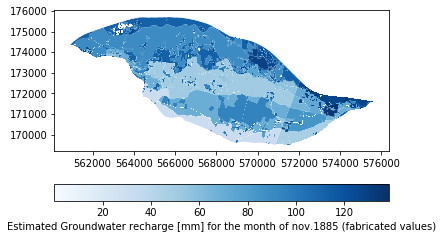

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)

newhydrotops.plot(column="nov.1885",ax=ax, legend=True, cmap="Blues",
                 legend_kwds={"label":"Estimated Groundwater recharge [mm] for"  
                              " the month of nov.1885 (fabricated values)",
                              "orientation": "horizontal"})